<a href="https://colab.research.google.com/github/sahilgarg510/learning_python/blob/main/NLP_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing required libraries.

In [ ]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import gutenberg
from string import punctuation
import matplotlib.pyplot as plt
import re
from collections import Counter

## Loading text file

In [ ]:
hamlet = gutenberg.open('/content/hamlet.txt')
hamlet = hamlet.readlines()
hamlet[:5]

['THE TRAGEDY OF HAMLET, PRINCE OF DENMARK\n',
 '\n',
 '\n',
 'by William Shakespeare\n',
 '\n']

## Clean unwanted spaces

In [ ]:
hamlet = list(filter(None, [item.strip('\n') for item in hamlet]))

## Text statistics

In [ ]:
total_char = 0
for line in hamlet:
  total_char= total_char+len(line)

print(f"total characters in hemlet {total_char}")

total characters in hemlet 187267


In [ ]:
total_words = 0
for line in hamlet:
  words = line.split()
  total_words = total_words + len(words)


print(f"total words in hamlet {total_words}")

total words in hamlet 52044


In [ ]:
total_line =len(hamlet)
print(f"total number of sentences {total_line}")

total number of sentences 4168


In [ ]:
longest_line = max(hamlet, key =len)
print(f'longest line in document: {longest_line}')

longest line in document: Enter King, Queen, Polonius, Ophelia, Rosencrantz, Guildenstern, and Lords.


In [ ]:
shortest_line =min(hamlet, key =len)
print(f'shortest line in document: {shortest_line}')

shortest line in document:   


## Lingusitics Analysis

In [ ]:
# cleaning of words
tokens = [item.split() for item in hamlet]
words = [word for sentence in tokens for word in sentence]
words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in words]))

In [ ]:
# tagging of words
pos_tags = nltk.pos_tag(words, tagset='universal', lang='eng')
pos_tags[:10]

[('tragedy', 'NOUN'),
 ('hamlet', 'NOUN'),
 ('prince', 'NOUN'),
 ('denmark', 'NOUN'),
 ('william', 'NOUN'),
 ('shakespeare', 'NOUN'),
 ('dramatis', 'NOUN'),
 ('personae', 'NOUN'),
 ('claudius', 'NOUN'),
 ('king', 'VERB')]

In [ ]:
# function to find all tag of specific class and show 5 most common
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(10)) for tag in cfd.conditions())

In [ ]:
# Find most common Nouns
tagdict = findtags('NOUN', pos_tags)

for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NOUN [('ham', 249), ('lord', 172), ('hamlet', 92), ('hor', 89), ('thou', 67), ('tis', 62), ('pol', 58), ('hath', 53), ('man', 52), ('let', 50)]


In [ ]:
# Find most common Verbs
tagdict = findtags('VERB', pos_tags)

for tag in sorted(tagdict):
    print(tag, tagdict[tag])

VERB [('king', 158), ('shall', 114), ('come', 93), ('would', 81), ('may', 71), ('go', 71), ('know', 66), ('must', 61), ('ham', 56), ('say', 53)]


In [ ]:
# Find most common Adjectives
tagdict = findtags('ADJ', pos_tags)

for tag in sorted(tagdict):
    print(tag, tagdict[tag])

ADJ [('good', 108), ('queen', 97), ('thy', 67), ('ham', 49), ('much', 36), ('lord', 36), ('guildenstern', 30), ('dead', 30), ('speak', 28), ('great', 26)]


## Words per sentence distribution

(array([  66.,  274.,  237.,  692.,  570., 1401.,  536.,  182.,  182.,
          28.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

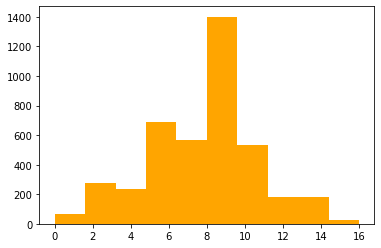

In [84]:
total_tokens_per_line = [len(sentence.split()) for sentence in hamlet]
plt.hist(total_tokens_per_line, color='orange')

## Get most common words in data

In [ ]:
# removing stop words as these used most of the time and these words dont provide any specific details.
words = [word.lower() for word in words if word.lower() not in stopwords]

# getting frequency of all the words and printing top 10 words.
c = Counter(words)
c.most_common(10)

[('ham', 358),
 ('lord', 225),
 ('king', 196),
 ('queen', 120),
 ('shall', 114),
 ('good', 109),
 ('hor', 109),
 ('hamlet', 107),
 ('come', 107),
 ('thou', 105)]

## get list of words based on value count of frequency.

In [ ]:
def get_words(numb):
  words = []
  for key, value in c.items():
    if numb == value:
      words.append(key)
 
  return words

In [ ]:
# checking for exact frequency of 50 words
print(get_words(50)) # no words with 50 freq
print(get_words(46)) # 2 words having freq of 46

[]
['laertes', 'time']
